<a href="https://colab.research.google.com/github/Chi-Matty/construction_data_analysis/blob/main/construction_project_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import files
uploaded = files.upload()

Saving construction_project_status 2.csv to construction_project_status 2 (2).csv


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from datetime import datetime
import seaborn as sns

In [82]:
df = pd.read_csv('construction_project_status 2.csv')
df.head()

,Project ID,Site Location,Project Status,Material Cost,Labor Hours,Project Progress,Report Date
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20
3,P004,Site A,In Progress,160000.0,2600.0,80%,2024-01-20
4,P005,Site D,Completed,110000.0,1700.0,100%,2023-11-15


In [59]:
#Removing duplicates in IDs and drop_duplicates
dfs.drop_duplicates(subset=['Project_ID', 'Report_Date'], inplace=True)

In [60]:
dfs = df.copy()
dfs.rename(columns={
    'Project ID': 'Project_ID',
    'Site Location': 'Site_Location',
    'Project Status': 'Project_Status',
    'Material Cost': 'Material_Cost',
    'Labor Hours': 'Labor_Hours',
    'Project Progress': 'Project_Progress',
    'Report Date': 'Report_Date'
}, inplace=True)

### Replacing missing values/NAs in Materia cost and Labor hours with mean values

In [61]:
dfs['Material_Cost'] = dfs['Material_Cost'].fillna(dfs['Material_Cost'].mean())
dfs['Labor_Hours'] = dfs['Labor_Hours'].fillna(dfs['Labor_Hours'].mean())

### Converting to appropriate data type

In [62]:
dfs['Report_Date'] = pd.to_datetime(dfs['Report_Date'])
dfs['Project_Progress_New'] = dfs['Project_Progress'].str.rstrip('%').astype(float)

### Standardized Text Data

In [63]:
dfs['Project_Status'] = dfs['Project_Status'].str.title()

In [64]:
#Identify and Address Outliers
dfs[['Material_Cost', 'Labor_Hours', 'Project_Progress_New']].describe().round(2)

,Material_Cost,Labor_Hours,Project_Progress_New
count,116.00,116.00,116.00
mean,190173.91,2810.00,83.91
std,57331.72,777.18,17.29
min,90000.00,1400.00,40.00
25%,140000.00,2100.00,72.00
50%,190086.96,2900.00,90.00
75%,230000.00,3400.00,100.00
max,340000.00,4600.00,100.00


### Box Plot for Material Cost, Labor hours and Project Progress

In [65]:
print('There are no outliers')

There are no outliers


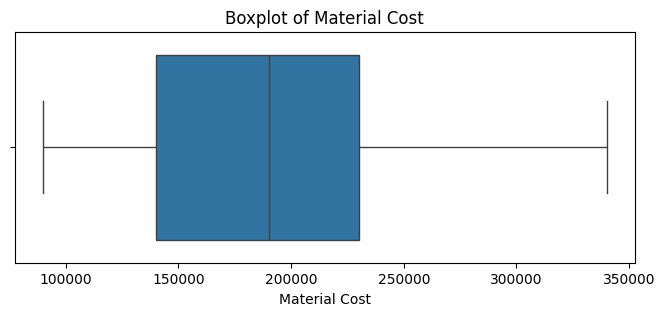

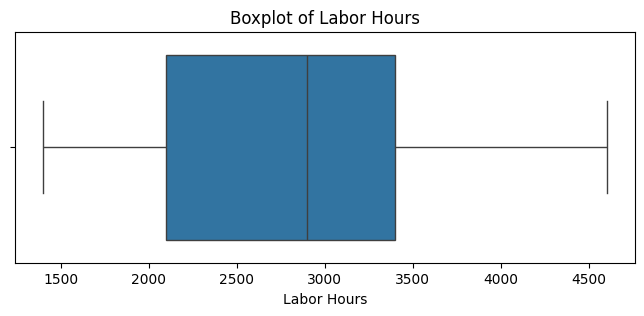

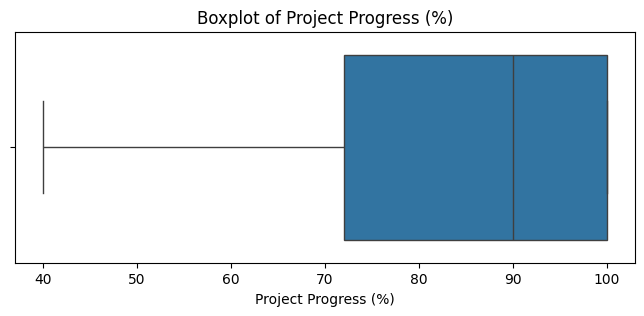

In [66]:
# Boxplot for Material Cost
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Material_Cost'])
plt.title('Boxplot of Material Cost')
plt.xlabel('Material Cost')
plt.show()

# Boxplot for Labor Hours
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Labor_Hours'])
plt.title('Boxplot of Labor Hours')
plt.xlabel('Labor Hours')
plt.show()

# Boxplot for Project Progress
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Project_Progress_New'])
plt.title('Boxplot of Project Progress (%)')
plt.xlabel('Project Progress (%)')
plt.show()

In [67]:
#Cost Efficiency: Which 'Site Location' has the highest average 'Material Cost' per project, and which has the lowest?
average_mat_cost = dfs.groupby('Site_Location')[['Material_Cost']].mean()
max_average_site = average_mat_cost.idxmax()
max_cost = average_mat_cost.max()
min_average_site = average_mat_cost.idxmin()
min_cost = average_mat_cost.min()
average_mat_cost.sort_values('Material_Cost')

,Material_Cost
Site_Location,
Site G,115384.615385
Site D,128214.285714
Site B,148940.993789
Site A,178157.894737
Site F,209615.384615
Site C,220666.666667
Site E,240666.666667
Site H,280769.230769


In [68]:
print(f"{max_average_site} has the highest average, spending {max_cost} while {min_average_site} has the lowest average, spending {min_cost}")

Material_Cost    Site H
dtype: object has the highest average, spending Material_Cost    280769.230769
dtype: float64 while Material_Cost    Site G
dtype: object has the lowest average, spending Material_Cost    115384.615385
dtype: float64


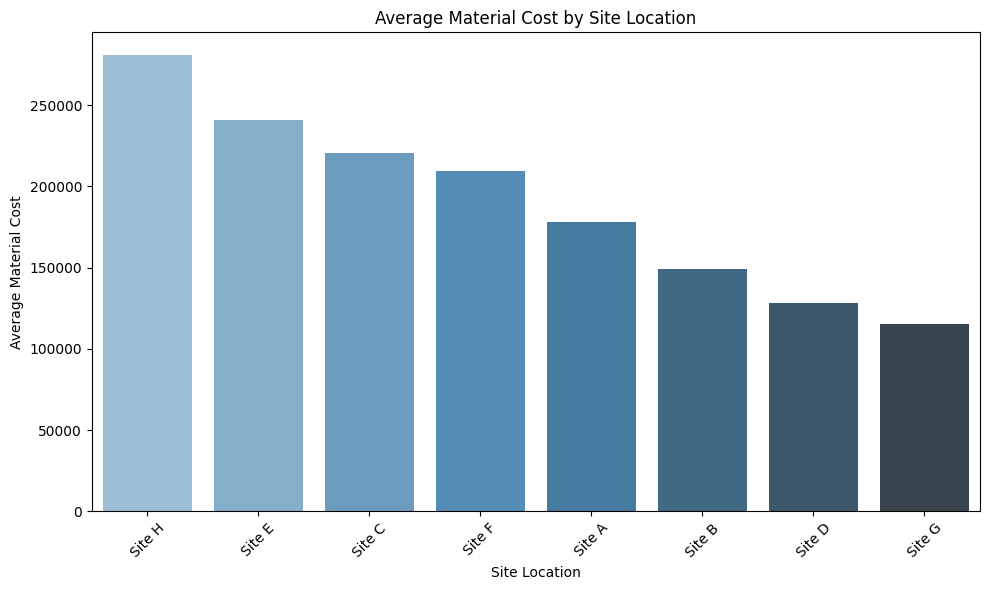

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_mat_cost_df, x='Site Location', y='Average Material Cost', hue='Site Location', palette='Blues_d', legend=False)

plt.title('Average Material Cost by Site Location')
plt.xlabel('Site Location')
plt.ylabel('Average Material Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
#Labor Utilization: Is there a correlation between 'Labor Hours' and 'Project Progress'
labour_project_corr = dfs['Labor_Hours'].corr(dfs['Project_Progress_New'])
print(f"{labour_project_corr:.2f}")
print('There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly')

-0.36
There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly


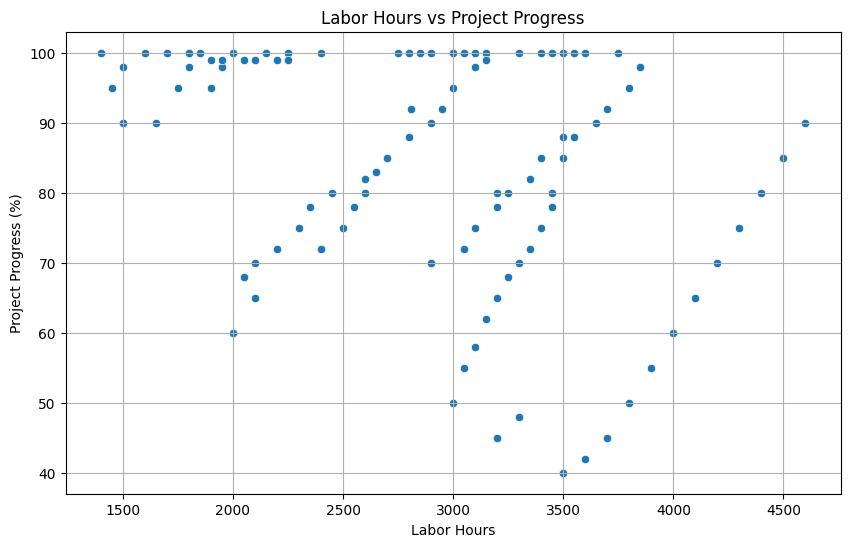

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labor_Hours', y='Project_Progress_New', data=dfs)
plt.title('Labor Hours vs Project Progress')
plt.xlabel('Labor Hours')
plt.ylabel('Project Progress (%)')
plt.grid(True)
plt.show()

In [72]:
dfs.head()

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15,75.0
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01,100.0
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20,50.0
3,P004,Site A,In Progress,160000.0,2600.0,80%,2024-01-20,80.0
4,P005,Site D,Completed,110000.0,1700.0,100%,2023-11-15,100.0


In [73]:
#Provide a count of projects in each 'Project Status' (e.g., "Completed", "In Progress", "Delayed").
status_group = dfs.groupby('Project_Status').size().reset_index(name='Count')
status_group

,Project_Status,Count
0,Completed,33
1,Delayed,13
2,In Progress,70


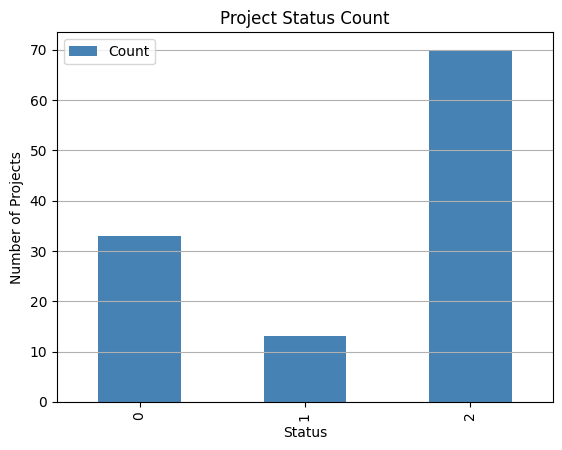

In [74]:
status_group.plot(kind='bar', color='steelblue')
plt.title('Project Status Count')
plt.xlabel('Status')
plt.ylabel('Number of Projects')
plt.grid(axis='y')
plt.show()

#### Monthly Trends: What are the total 'Material Cost' and 'Labor Hours' incurred each month, based on the 'Report Date'?

In [75]:
dfs['Report_Month'] = dfs['Report_Date'].dt.to_period('M')
trend = dfs.groupby('Report_Month')[['Material_Cost', 'Labor_Hours']].sum().round(2)
trend

,Material_Cost,Labor_Hours
Report_Month,,
2023-11,220000.00,3400.0
2023-12,240000.00,3600.0
2024-01,1225000.00,19050.0
2024-02,2065000.00,30950.0
2024-03,2145173.91,34060.0
2024-04,1280000.00,19400.0
2024-05,1300000.00,19500.0
2024-06,1275000.00,18950.0
2024-07,1275000.00,18950.0


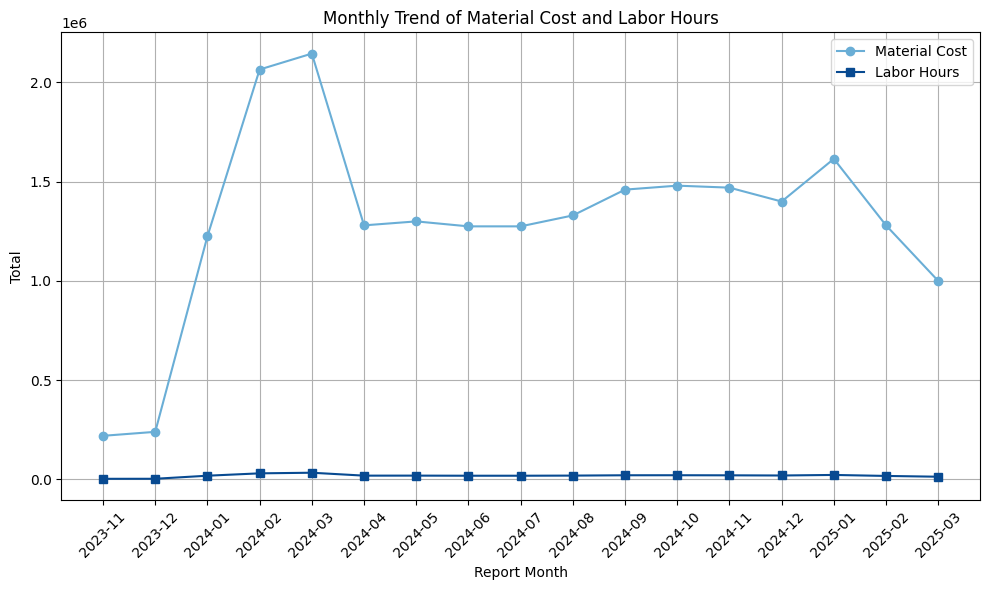

In [76]:
line_colors = plt.cm.Blues(np.linspace(0.5, 0.9, 2))

plt.figure(figsize=(10, 6))
plt.plot(trend.index.astype(str), trend['Material_Cost'], label='Material Cost', marker='o', color=line_colors[0])
plt.plot(trend.index.astype(str), trend['Labor_Hours'], label='Labor Hours', marker='s', color=line_colors[1])

plt.title('Monthly Trend of Material Cost and Labor Hours')
plt.xlabel('Report Month')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
#Top 5 and Bottom 5 Projects: Based on a combined metric of 'Material Cost' and 'Labor Hours'
avg_labor_hour = dfs['Labor_Hours'].mean().round(2)
avg_material_cost = dfs['Material_Cost'].mean().round(2)
avg_labor_rate = (avg_material_cost/avg_labor_hour).round(2)
dfs['Total_Cost'] = (dfs['Material_Cost'] + dfs['Labor_Hours']) * avg_labor_rate
top_5 = dfs.nlargest(5, 'Total_Cost')
bottom_5 = dfs.nsmallest(5, 'Total_Cost')

In [78]:
top_5

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New,Report_Month,Total_Cost
114,P100,Site H,In Progress,340000.0,4600.0,90%,2025-03-15,90.0,2025-03,23322528.0
105,P092,Site H,In Progress,330000.0,4500.0,85%,2025-02-05,85.0,2025-02,22638960.0
96,P084,Site H,Delayed,320000.0,4400.0,80%,2025-01-01,80.0,2025-01,21955392.0
87,P076,Site H,In Progress,310000.0,4300.0,75%,2024-11-30,75.0,2024-11,21271824.0
78,P068,Site H,In Progress,300000.0,4200.0,70%,2024-10-25,70.0,2024-10,20588256.0


In [79]:
bottom_5

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New,Report_Month,Total_Cost
16,P014,Site G,Completed,90000.0,1400.0,100%,2024-01-10,100.0,2024-01,6185952.0
106,P014,Site G,Completed,90000.0,1400.0,100%,2024-01-10,100.0,2024-01,6185952.0
25,P021,Site G,In Progress,95000.0,1450.0,95%,2024-04-01,95.0,2024-04,6527736.0
10,P010,Site D,In Progress,100000.0,1500.0,90%,2024-02-15,90.0,2024-02,6869520.0
33,P028,Site G,In Progress,100000.0,1500.0,98%,2024-05-01,98.0,2024-05,6869520.0
